


## Preprocessamiento con Pandas
¿Qué veremos?
*  Como cargar la base de datos y limpiar datos faltantes




La mayor parte de un proyecto de ciencia de datos consiste en la limpieza y manipulación de datos. La mayoría de estas tareas de limpieza de datos se pueden desglosar en seis áreas:

*  Imputación de valores perdidos. Imputación estadística constante estándar, imputación KNN.
*  Detección de anomalías. Algoritmos de detección de valores atípicos: Isolation Forest, One Class SVM, Local Outlier Factor.
*   Métodos de limpieza de variables X. Aplicación de funciones personalizadas, eliminación de duplicados, sustitución de valores.
*    Métodos de limpieza de variables Y. Codificación de etiquetas, mapeo de diccionarios, codificación de una sola vez.
*    Unión de marcos de datos. Concatenar, fusionar y unir.
*     Análisis de fechas. Auto-formato-detección de la conversión cadena-hora, objetos fecha-hora a números.

In [89]:
## Unión de marcos de datos. Concatenar y  fusionar. 

In [90]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [91]:
import os
datapath = os.path.join("datasets","lifesat", "")

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Leer el dataset oecd_bli_2015.csv
Datos del OECD
https://stats.oecd.org/index.aspx?DataSetCode=BLI
El Índice de calidad de vida pretende discutir indicadores sobre el bienestar de las sociedades, y capacitarlos para que estén más informados y participen en el proceso de elaboración de políticas que da forma a todas nuestras vidas. Cada uno de los 11 temas del Índice se basa actualmente en uno o tres indicadores. Dentro de cada tema, los indicadores se promedian con igual peso. Los indicadores se han elegido en función de una serie de criterios estadísticos, como la relevancia (validez nominal, profundidad, relevancia política) y la calidad de los datos (validez predictiva, cobertura, actualidad, comparabilidad entre países, etc.) y en consulta con los países miembros de la OCDE.

In [93]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')


In [94]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


## Leer el dataset de ingreso per cápita gdp_per_capita.csv
Datos del Fondo monetario internacional https://www.imf.org/en/Home

In [95]:
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")


In [96]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


Filtrar las estadisticas por sexo para comparar "INEQUALITY" =="MN" o "WMN"

In [97]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]


Extraer el indicador con pivot   
    foo   bar  baz  zoo
0   one   A    1    x
1   one   B    2    y
2   one   C    3    z
3   two   A    4    q
4   two   B    5    w
5   two   C    6    t

df.pivot(index='foo', columns='bar', values='baz')

bar  A   B   C
foo
one  1   2   3
two  4   5   6


User index="Country", columns="Indicator", values="Value"


In [98]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
 

In [99]:
oecd_bli.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


Ahora los datos del FMI

renombrar la columna 2015 por GDP per capita

In [100]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    

Hacer que el pais sea el indice

In [101]:
gdp_per_capita.set_index("Country", inplace=True)


Combinar los dos datasets

In [102]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
 

Ordenar por ingreso per capita

In [103]:
full_country_stats.sort_values(by="GDP per capita", inplace=True)


Remover los primeros 3 y los ultimos 3

In [104]:
datasetfinal= full_country_stats[["GDP per capita", 'Life satisfaction']]

Cuantos paises hay

In [105]:
len(datasetfinal)

36

Podemos tomar una muestra de 20

In [106]:
muestra=datasetfinal.sample(n=20, random_state=1)

In [107]:
muestra.describe()

,GDP per capita,Life satisfaction
count,20.000000,20.000000
mean,41037.318850,6.740000
std,19127.131244,0.856185
min,9054.914000,4.800000
25%,33306.301250,6.375000
50%,43467.538000,7.100000
75%,50881.403500,7.325000
max,80675.308000,7.500000


Visualizar el ingreso per capita vs life satisfaction

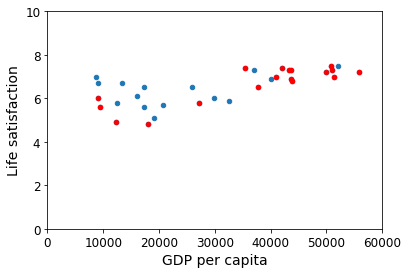

In [108]:
ax = datasetfinal.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
muestra.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', ax=ax,color='r')

plt.xlim(0, 60000)
plt.ylim(0, 10)
plt.show()


Graficar una recta 

y=6+5*x/100000
y=6+1*x/100000

In [109]:
X=np.linspace(0, 60000, 1000)


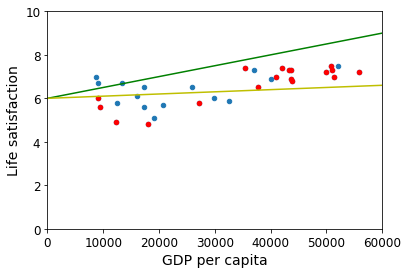

In [110]:
ax = datasetfinal.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
muestra.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', ax=ax,color='r')
plt.plot(X, 6+5*X/100000, "g")
plt.plot(X, 6+1*X/100000, "y")

plt.xlim(0, 60000)
plt.ylim(0, 10)
plt.show()

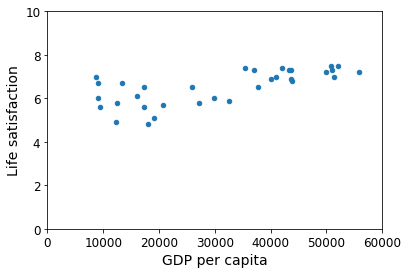

In [111]:

datasetfinal.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.xlim(0, 60000)
plt.ylim(0, 10)
plt.show()



## Imputar valores faltantes


# Ejemplo con pandas y datos categóricos

In [112]:
df = pd.read_csv('datasets/hepatitis.csv')
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


# Identificar los valores que faltan
Observamos que el conjunto de datos presenta algunos problemas. Por ejemplo, la columna correo electrónico no está disponible en todas las filas. En algunos casos presenta el valor `NaN`, lo que significa que el valor falta. 

Para comprobar si nuestro conjunto de datos contiene valores perdidos, podemos utilizar la función `isna()`, que devuelve si una celda del conjunto de datos es `NaN` o no. A continuación, podemos contar cuántos valores perdidos hay en cada columna.

In [113]:
df.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

Ahora podemos contar el porcentaje de valores perdidos para cada columna, simplemente dividiendo el resultado anterior por la longitud del conjunto de datos (len(df)) y multiplicando por 100.

In [114]:
df.isna().sum()/len(df)*100

age                 0.000000
sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64

Cuando se trata de valores perdidos, se pueden aplicar diferentes alternativas:
* comprobar la fuente, por ejemplo, poniéndose en contacto con la fuente de datos para corregir los valores que faltan
* eliminar los valores que faltan
* sustituir el valor que falta por un valor
* dejar el valor que falta tal y como está

## Eliminar los valores que faltan
La eliminación de los valores perdidos puede ser una de las siguientes alternativas:
* eliminar las filas con valores perdidos
* eliminar toda la columna que contenga valores perdidos
Podemos utilizar la función `dropna()` especificando el `eje` a considerar. Si ponemos `eje = 0` eliminamos toda la fila, si ponemos `eje = 1` eliminamos toda la columna. Si aplicamos la función `df.dropna(axis=0)` quedan 80 filas del conjunto de datos. Si aplicamos la función `df.dropna(axis=1)`, sólo quedan las columnas edad, sexo, antivirales, histología y clase. Sin embargo, los valores eliminados no se aplican al marco de datos original, sino sólo al resultado. Podemos utilizar el argumento `inplace=True` para almacenar los cambios en el marco de datos original `df` (`df.dropna(axis=1,inplace=True)`).


In [115]:
df.dropna(subset=['liver_big'],axis=0).head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live



Otra alternativa consiste en eliminar las columnas en las que se dispone de un determinado porcentaje de valores no nulos. Esto se puede conseguir mediante el parámetro `thresh`. En el siguiente ejemplo mantenemos sólo las columnas en las que hay al menos el 80% de valores no nulos. 

In [116]:
df.dropna(thresh=0.8*len(df),axis=1,inplace=True)
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,False,live


## Reemplazar valores perdidos
Una buena estrategia a la hora de tratar los valores perdidos consiste en sustituirlos por otro valor. Normalmente, se adoptan las siguientes estrategias:
* para los valores numéricos sustituir el valor que falta por el valor medio de la columna
* Para los valores categóricos, sustituya el valor que falta por el valor más frecuente de la columna. 
* utilizar otras funciones

Para sustituir los valores que faltan, se pueden utilizar tres funciones: `fillna()`, `replace()` y `interpolate()`.
La función `fillna()` sustituye todos los valores NaN por el valor pasado como argumento.
Por ejemplo, en el caso de los valores numéricos, todos los valores NaN de las columnas numéricas pueden ser sustituidos por el valor medio. 
Para listar el tipo de una columna, podemos utilizar el atributo `dtypes` de la siguiente manera:

In [117]:
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [118]:
numeric.columns

Index(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin'], dtype='object')

In [119]:
df[numeric_columns] = df[numeric_columns].fillna(df.mean())

<ipython-input-119-fdaac0744f5f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[numeric_columns] = df[numeric_columns].fillna(df.mean())


In [120]:
df.isna().sum()/len(df)*100

age                0.000000
sex                0.000000
steroid            0.645161
antivirals         0.000000
fatigue            0.645161
malaise            0.645161
anorexia           0.645161
liver_big          6.451613
liver_firm         7.096774
spleen_palpable    3.225806
spiders            3.225806
ascites            3.225806
varices            3.225806
bilirubin          0.000000
alk_phosphate      0.000000
sgot               0.000000
albumin            0.000000
histology          0.000000
class              0.000000
dtype: float64

## Columnas categóricas
Observamos que en `dtypes` las columnas categoriales se describen como objetos. Por lo tanto, podemos seleccionar las columnas `objeto`. Nos gustaría considerar sólo las columnas booleanas. Sin embargo, el tipo `object` incluye también la columna `class`, que es una cadena. Seleccionamos todas las columnas de objetos y eliminamos de ellas la columna `class`. Entonces podemos convertir el tipo del resultado a `bool`.

In [121]:
boolean_columns = df.select_dtypes(include=np.object).columns.tolist()
boolean_columns.remove('class')
df[boolean_columns] = df[boolean_columns].astype('bool')

In [122]:
df[boolean_columns].fillna(df.mode())

,sex,steroid,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices
0,True,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False
2,True,True,True,False,False,True,False,False,False,False,False
3,True,True,False,False,False,True,False,False,False,False,False
4,True,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
150,True,True,True,True,True,True,False,False,True,True,True
151,True,True,True,False,False,True,True,False,False,False,False
152,True,False,True,True,False,False,True,False,True,False,False
153,True,False,True,False,False,True,False,True,True,False,True


In [123]:
df.isna().sum()/len(df)*100

age                0.0
sex                0.0
steroid            0.0
antivirals         0.0
fatigue            0.0
malaise            0.0
anorexia           0.0
liver_big          0.0
liver_firm         0.0
spleen_palpable    0.0
spiders            0.0
ascites            0.0
varices            0.0
bilirubin          0.0
alk_phosphate      0.0
sgot               0.0
albumin            0.0
histology          0.0
class              0.0
dtype: float64

## Interpolación
Otra solución para reemplazar los valores perdidos implica el uso de otras funciones, como la interpolación lineal. En este caso, por ejemplo, podríamos reemplazar un valor faltante sobre una columna, con la interpolación entre la anterior y la siguiente. Esto se puede conseguir mediante el uso de la función `interpolar()`.

Como ya hemos gestionado todos los valores perdidos, recargamos el conjunto de datos.

In [124]:
df = pd.read_csv('datasets/hepatitis.csv')
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

Ahora podemos aplicar la función `interpolar()` a las columnas numéricas, estableciendo también la dirección del límite como `hacia adelante`. Esto significa que la interpolación lineal se aplica desde la primera fila hasta la última.

In [125]:
df[numeric_columns] = df[numeric_columns].interpolate(method ='linear', limit_direction ='forward')

Por ejemplo, en la línea 6 la columna bilirrubina, que era NaN antes de la interpolación, asume ahora el valor 0,95, que es la interpolación entre 0,90 (línea 4) y 1,00 (línea 6).

In [126]:
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.00,85.0,18.000000,4.000000,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.90,135.0,42.000000,3.500000,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.70,96.0,32.000000,4.000000,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.70,46.0,52.000000,4.000000,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.00,70.5,200.000000,4.000000,77.5,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.90,95.0,28.000000,4.000000,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,0.95,91.6,34.666667,4.133333,77.0,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.00,88.2,41.333333,4.266667,79.0,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.70,84.8,48.000000,4.400000,81.0,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.00,81.4,120.000000,3.900000,83.0,False,live
